In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

C:\Users\anage\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [17]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9736842105263158

In [47]:
ada = AdaBoostClassifier(n_estimators= 20, learning_rate= 1.5)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\anage\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9824561403508771

In [39]:
ada.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [41]:
ada.estimator_errors_

array([0.07912088, 0.11083811, 0.18247626, 0.24510026, 0.21059036,
       0.2772981 , 0.30797694, 0.34134432, 0.34497659, 0.33507042])

## plotting each decision stump in the Adaboost

In [55]:
from sklearn import tree

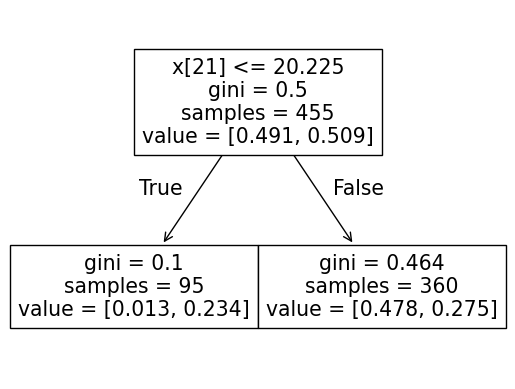

In [65]:
li = ada.estimators_

for i in range (0, len(li)):
    #print(type(li[0]))
    #print(li[i].get_depth())
    tree.plot_tree(li[i])
    print()
    

[Text(0.5, 0.75, 'x[21] <= 25.725\ngini = 0.49\nsamples = 455\nvalue = [0.57, 0.43]'),
 Text(0.25, 0.25, 'gini = 0.355\nsamples = 246\nvalue = [0.114, 0.38]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.177\nsamples = 209\nvalue = [0.456, 0.049]'),
 Text(0.625, 0.5, '  False')]

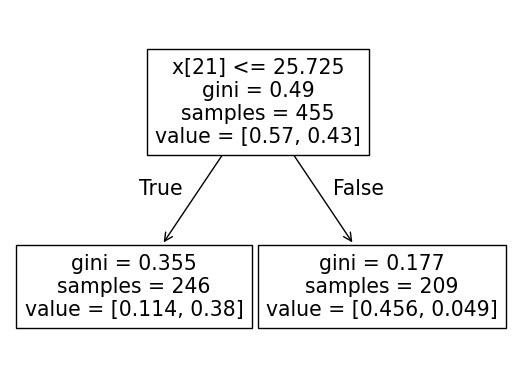

In [63]:
tree.plot_tree(li[1])

In [76]:
from sklearn.model_selection import train_test_split,GridSearchCV
ada = AdaBoostClassifier()
parameters = {
    'n_estimators' : [10,20, 50],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 1.5,2]
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\anage\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 1.5, 2],
                         'n_estimators': [10, 20, 50]},
             verbose=1)

In [78]:
grid_search.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [80]:
ada = AdaBoostClassifier(n_estimators= 50, learning_rate= 1)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\anage\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9736842105263158

In [82]:
ada = AdaBoostClassifier(n_estimators= 20, learning_rate= 1.5)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\anage\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9824561403508771

In [119]:
ada.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

# AdaBoost Regressor

In [85]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, 
                       n_features=1, 
                       n_informative=10, 
                       n_targets=1, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [117]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

add = AdaBoostRegressor(n_estimators=500, learning_rate = 1)
add.fit(X_train, y_train)
y_pred = add.predict(X_test)
r2_score(y_test, y_pred)

0.8866209717146241